In [1]:
# Importing the basic liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Downloading the assets data

stocks = ['RELIANCE.NS','LT.NS','TATASTEEL.NS','NTPC.NS','SBIN.NS',
          'VEDL.NS','SUZLON.NS','INDHOTEL.NS','BLUESTARCO.NS','BSOFT.NS']
data = yf.download (stocks, start = '2024-01-01', end = '2024-12-31') ['Close']
data

[*********************100%***********************]  10 of 10 completed


Ticker,BLUESTARCO.NS,BSOFT.NS,INDHOTEL.NS,LT.NS,NTPC.NS,RELIANCE.NS,SBIN.NS,SUZLON.NS,TATASTEEL.NS,VEDL.NS
Date,,,,,,,,,,
2024-01-01,944.882996,695.278137,434.792084,3497.952881,300.148621,1290.744263,630.772156,38.500000,137.087997,233.829941
2024-01-02,947.173523,680.478699,436.885803,3411.284424,296.514832,1301.432983,628.903503,38.250000,136.842926,234.739258
2024-01-03,937.862122,678.845337,450.096069,3413.516846,296.708679,1287.281006,632.837524,37.799999,132.676865,239.876877
2024-01-04,931.787354,680.577698,461.411987,3431.723633,307.270782,1293.933350,632.149048,38.700001,131.598587,242.013763
2024-01-05,940.102844,707.157288,454.682251,3494.430664,305.187408,1299.439697,631.362305,40.599998,131.010437,241.740997
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2005.800049,573.700012,859.400024,3640.500000,331.067566,1222.300049,821.150024,63.860001,141.710007,464.700012
2024-12-24,1983.199951,579.700012,862.650024,3639.750000,332.704773,1222.750000,812.049988,64.870003,140.380005,462.100006
2024-12-26,2039.199951,570.250000,868.299988,3629.500000,332.059814,1216.550049,812.450012,64.339996,140.360001,460.450012


In [14]:
# Downloading the index data

index = ['^NSEI']
prices = yf.download (index, start = '2024-01-01', end = '2024-12-31')['Close']
prices

[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2024-01-01,21741.900391
2024-01-02,21665.800781
2024-01-03,21517.349609
2024-01-04,21658.599609
2024-01-05,21710.800781
...,...
2024-12-23,23753.449219
2024-12-24,23727.650391
2024-12-26,23750.199219


In [6]:
# Listing the Market Caps for the assets

market_caps = {
    'RELIANCE.NS': 16619780000000,
    'LT.NS': 4606930000000,
    'TATASTEEL.NS': 1757180000000,
    'NTPC.NS': 3163540000000,
    'SBIN.NS': 6443570000000,
    'VEDL.NS': 1677680000000,
    'SUZLON.NS': 752990000000,
    'INDHOTEL.NS': 1078320000000,
    'BLUESTARCO.NS': 390970000000,
    'BSOFT.NS': 131870000000
}

In [7]:
# Importing Python Portfolio Optimization Modules

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

In [8]:
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()
S

Ticker,BLUESTARCO.NS,BSOFT.NS,INDHOTEL.NS,LT.NS,NTPC.NS,RELIANCE.NS,SBIN.NS,SUZLON.NS,TATASTEEL.NS,VEDL.NS
Ticker,,,,,,,,,,
BLUESTARCO.NS,0.136273,0.014932,0.019609,0.018501,0.018598,0.012836,0.016993,0.032193,0.024588,0.020099
BSOFT.NS,0.014932,0.118051,0.029334,0.022288,0.021842,0.022115,0.020754,0.032931,0.031132,0.029902
INDHOTEL.NS,0.019609,0.029334,0.103388,0.027089,0.031375,0.021075,0.023223,0.034260,0.029749,0.033804
LT.NS,0.018501,0.022288,0.027089,0.083762,0.044805,0.031261,0.038191,0.021378,0.035140,0.027797
NTPC.NS,0.018598,0.021842,0.031375,0.044805,0.101744,0.035172,0.048875,0.032496,0.045591,0.043752
RELIANCE.NS,0.012836,0.022115,0.021075,0.031261,0.035172,0.059573,0.032920,0.021181,0.026887,0.027605
SBIN.NS,0.016993,0.020754,0.023223,0.038191,0.048875,0.032920,0.089019,0.028316,0.037383,0.037983
SUZLON.NS,0.032193,0.032931,0.034260,0.021378,0.032496,0.021181,0.028316,0.193832,0.035990,0.039345
TATASTEEL.NS,0.024588,0.031132,0.029749,0.035140,0.045591,0.026887,0.037383,0.035990,0.090960,0.061393


<Axes: >

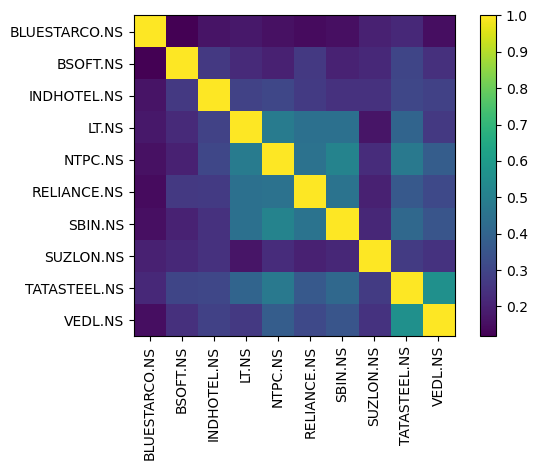

In [10]:
plotting.plot_covariance(S, plot_correlation = True)

In [15]:
# Calculating the delta

delta = black_litterman.market_implied_risk_aversion(prices)
delta

4.847033944799877

In [16]:
# Calculating the market prior

market_prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
market_prior

Ticker
BLUESTARCO.NS    0.085293
BSOFT.NS         0.113261
INDHOTEL.NS      0.129936
LT.NS            0.192852
NTPC.NS          0.218341
RELIANCE.NS      0.211452
SBIN.NS          0.216583
SUZLON.NS        0.140933
TATASTEEL.NS     0.175970
VEDL.NS          0.182152
dtype: float64

<Axes: ylabel='Ticker'>

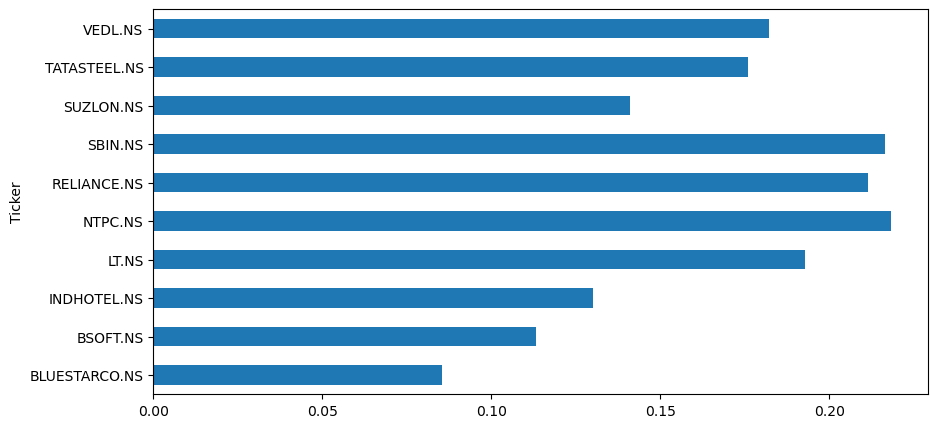

In [18]:
# Plotting the Market Prior

market_prior.plot.barh(figsize = (10,5))

In [19]:
# Providing views for the assets

viewdict = {
    'RELIANCE.NS': 0.10,
    'LT.NS': 0.05,
    'TATASTEEL.NS': 0.15,
    'NTPC.NS': 0.15,
    'SBIN.NS': 0.1,
    'VEDL.NS': 0.2,
    'SUZLON.NS': 0.2,
    'INDHOTEL.NS': 0.2,
    'BLUESTARCO.NS': 0.25,
    'BSOFT.NS': 0.15
}

In [32]:
# Calculatig Posterior Estimates of returns

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)
ret_bl = bl.bl_returns()
ret_bl

Ticker
BLUESTARCO.NS    0.159903
BSOFT.NS         0.123814
INDHOTEL.NS      0.153183
LT.NS            0.114735
NTPC.NS          0.161435
RELIANCE.NS      0.148390
SBIN.NS          0.145590
SUZLON.NS        0.169488
TATASTEEL.NS     0.152954
VEDL.NS          0.176652
dtype: float64

In [33]:
# Comparing all the 3 returns Prior, Posterior and Views

rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
BLUESTARCO.NS,0.085293,0.159903,0.25
BSOFT.NS,0.113261,0.123814,0.15
INDHOTEL.NS,0.129936,0.153183,0.20
LT.NS,0.192852,0.114735,0.05
NTPC.NS,0.218341,0.161435,0.15
RELIANCE.NS,0.211452,0.148390,0.10
SBIN.NS,0.216583,0.145590,0.10
SUZLON.NS,0.140933,0.169488,0.20
TATASTEEL.NS,0.175970,0.152954,0.15
VEDL.NS,0.182152,0.176652,0.20


<Axes: >

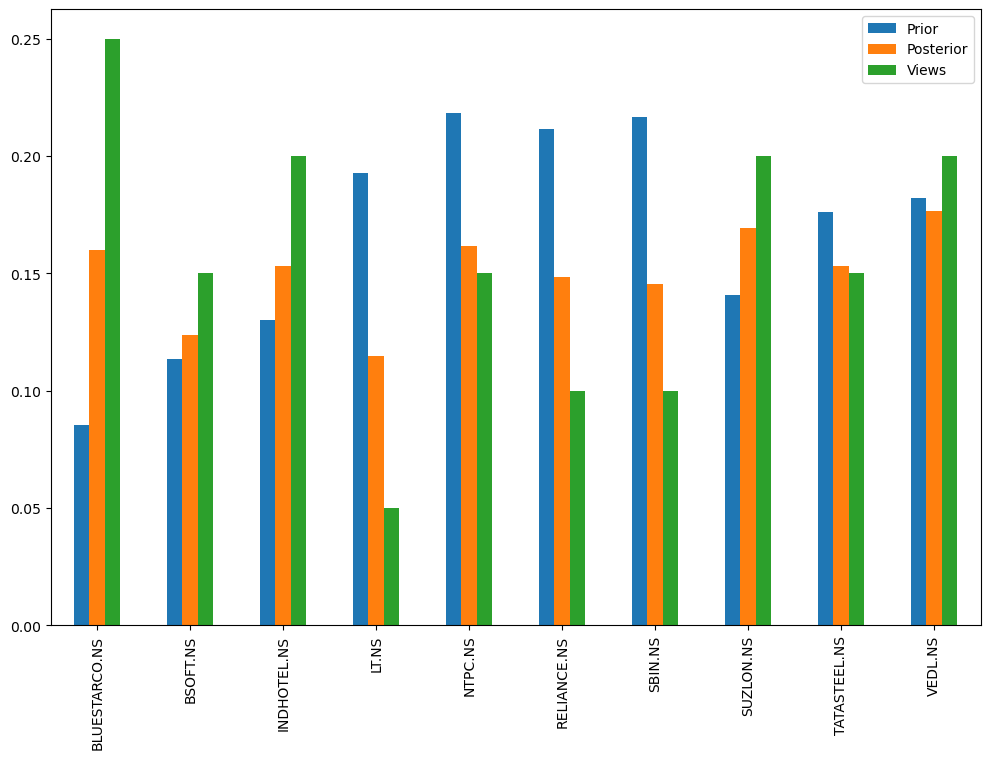

In [34]:
# Plotting the graph of all the 3 returns

rets_df.plot.bar(figsize=(12,8))

In [35]:
# Calculating Posterior Covariance Estimate

S_bl = bl.bl_cov()
S_bl

Ticker,BLUESTARCO.NS,BSOFT.NS,INDHOTEL.NS,LT.NS,NTPC.NS,RELIANCE.NS,SBIN.NS,SUZLON.NS,TATASTEEL.NS,VEDL.NS
Ticker,,,,,,,,,,
BLUESTARCO.NS,0.139578,0.015002,0.019742,0.018614,0.018664,0.012885,0.017066,0.032484,0.024766,0.020177
BSOFT.NS,0.015002,0.120827,0.029573,0.022405,0.021887,0.022273,0.020828,0.033188,0.031355,0.030071
INDHOTEL.NS,0.019742,0.029573,0.105767,0.027265,0.031565,0.021189,0.023306,0.034522,0.029909,0.034026
LT.NS,0.018614,0.022405,0.027265,0.085550,0.045175,0.031514,0.038482,0.021420,0.035373,0.027861
NTPC.NS,0.018664,0.021887,0.031565,0.045175,0.103818,0.035433,0.049293,0.032666,0.045925,0.044017
RELIANCE.NS,0.012885,0.022273,0.021189,0.031514,0.035433,0.060853,0.033185,0.021273,0.027020,0.027748
SBIN.NS,0.017066,0.020828,0.023306,0.038482,0.049293,0.033185,0.090892,0.028462,0.037614,0.038212
SUZLON.NS,0.032484,0.033188,0.034522,0.021420,0.032666,0.021273,0.028462,0.198411,0.036209,0.039597
TATASTEEL.NS,0.024766,0.031355,0.029909,0.035373,0.045925,0.027020,0.037614,0.036209,0.092794,0.062028


<Axes: >

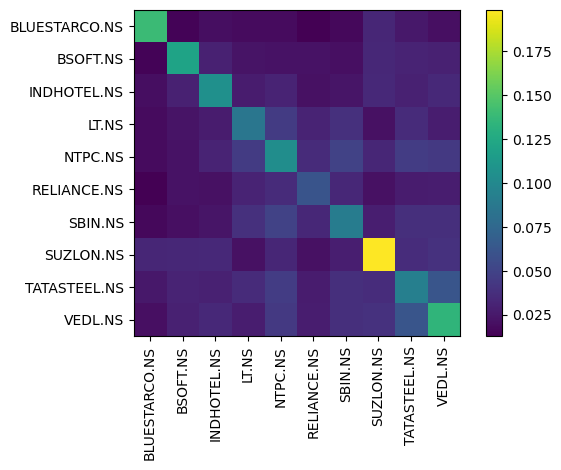

In [38]:
# Plotting the Posterior Covariance Estimate

plotting.plot_covariance(S_bl)

In [39]:
from pypfopt import EfficientFrontier, objective_functions

In [40]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('BLUESTARCO.NS', 0.11342),
             ('BSOFT.NS', 0.08092),
             ('INDHOTEL.NS', 0.10484),
             ('LT.NS', 0.07179),
             ('NTPC.NS', 0.10549),
             ('RELIANCE.NS', 0.10717),
             ('SBIN.NS', 0.09644),
             ('SUZLON.NS', 0.10663),
             ('TATASTEEL.NS', 0.09819),
             ('VEDL.NS', 0.11512)])

<Axes: >

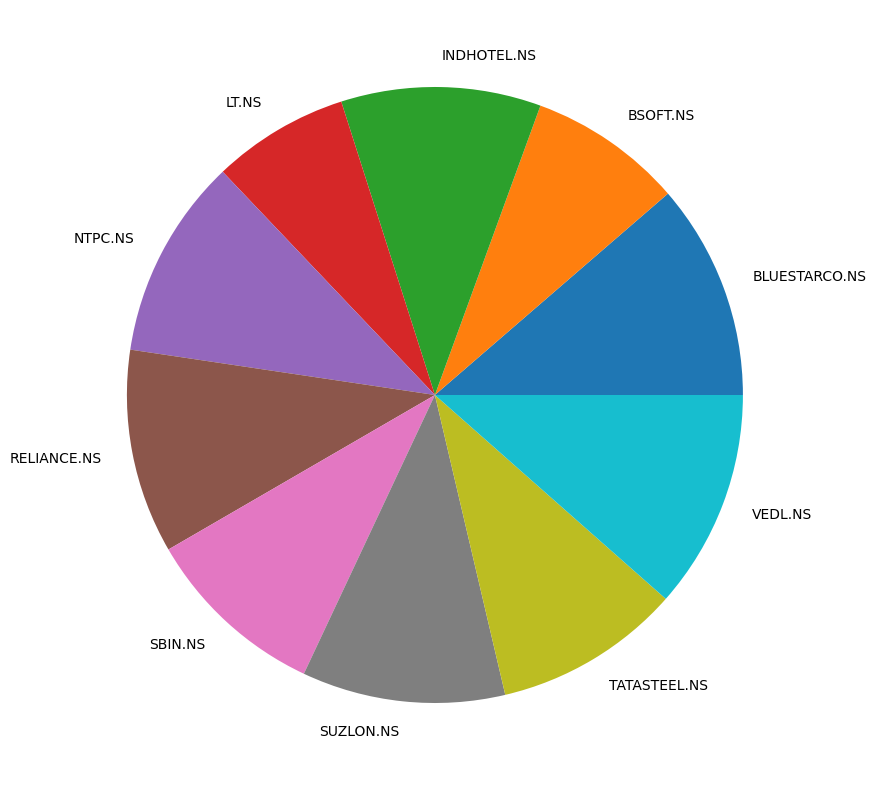

In [41]:
pd.Series(weights).plot.pie(figsize=(10,10))

In [43]:
ef.portfolio_performance(verbose = True)

Expected annual return: 15.3%
Annual volatility: 19.7%
Sharpe Ratio: 0.78


(0.1528509288632106, 0.19713190005180922, 0.7753738934339856)

In [47]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(data)
weights = weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000000)
allocation, leftover = da.lp_portfolio()
print("Discrete Allocation:", allocation)
print("Balance Amount: INR", leftover)

Discrete Allocation: {'BLUESTARCO.NS': 53, 'BSOFT.NS': 141, 'INDHOTEL.NS': 118, 'LT.NS': 20, 'NTPC.NS': 321, 'RELIANCE.NS': 89, 'SBIN.NS': 122, 'SUZLON.NS': 1734, 'TATASTEEL.NS': 717, 'VEDL.NS': 262}
Balance Amount: INR 221.83451738441363
